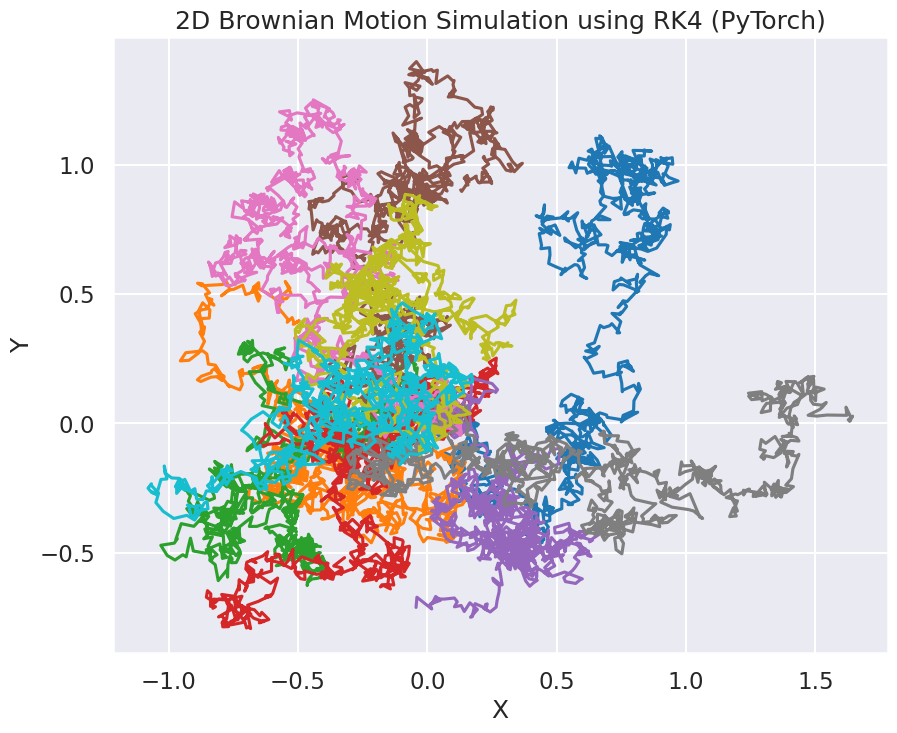

In [11]:
import torch
import matplotlib.pyplot as plt

def rk4_brownian_2d(x0, y0, t_end, num_steps, sigma):
    dt = t_end / num_steps
    sqrt_dt = torch.sqrt(torch.tensor(dt))
    
    t = torch.linspace(0, t_end, num_steps + 1)
    x = torch.zeros(num_steps + 1,x0.shape[0])
    y = torch.zeros(num_steps + 1,y0.shape[0])
    
    x[0] = x0
    y[0] = y0
    
    for i in range(num_steps):
        dW1 = torch.normal(0, sqrt_dt, size=(2,10))
        dW2 = torch.normal(0, sqrt_dt, size=(2,10))
        
        k1 = sigma * dW1
        k2 = sigma * (dW1 + dW2) / 2
        k3 = sigma * (dW1 + dW2) / 2
        k4 = sigma * dW2
        
        x[i+1] = x[i] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6
        y[i+1] = y[i] + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6
    
    return t, x, y

# Simulation parameters
N=10
x0, y0 = torch.zeros(N),torch.zeros(N)
t_end = 1
num_steps = 1000
sigma = 1

# Run simulation
t, x, y = rk4_brownian_2d(x0, y0, t_end, num_steps, sigma)

# Convert tensors to numpy arrays for plotting
x = x.numpy()
y = y.numpy()

# Plot results
plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.title("2D Brownian Motion Simulation using RK4 (PyTorch)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
# Convert the background to black color and then, make the browninan motion expand in all directions.